In [1]:
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('monokai')

# Project 5 _ Loan Status Prediction (Loan Status Prediction Dataset)
### YT - Siddhardhan

##### News Data ---> Data Pre-Processing ---> Train Test Split ---> Support Vector Machine Model (Classifier)

In [2]:
# Importing the Dependencies
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [3]:
# Data Collection and Processing
loan_data = pd.read_csv(r'C:\Users\Home\Desktop\ML Projects\YT - Siddharth\Loan_Status_Prediction.csv')
loan_data

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Home\\Desktop\\ML Projects\\YT - Siddharth\\Loan_Status_Prediction.csv'

In [ ]:
# Statistical Measures
loan_data.describe()

In [26]:
# No. of missing values
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
# Dropping the missing values
loan_data = loan_data.dropna()

In [28]:
# Label Encoding
loan_data.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [30]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [33]:
# Dependent Column Values
loan_data['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [34]:
# Replacing the Value of 3+ to 4
loan_data = loan_data.replace(to_replace='3+',value=4)

In [38]:
loan_data['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

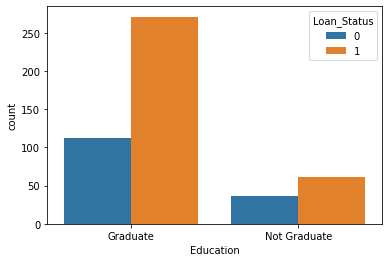

In [39]:
# Data Visualization
# Education and Loan Status
sns.countplot(x=loan_data['Education'],hue='Loan_Status',data=loan_data)

<AxesSubplot:xlabel='Married', ylabel='count'>

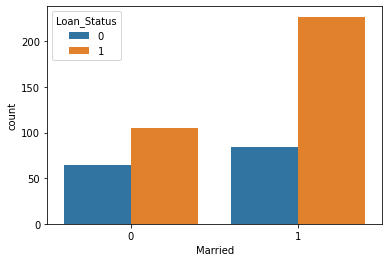

In [47]:
# Marital Status and Load Status
sns.countplot(x='Married',hue='Loan_Status',data=loan_data)

In [48]:
# Convert Categorical Columns to Numerical Values
loan_data.replace({'Married':{'No':0,"Yes":1},
                              'Gender':{'Male':1,'Female':0},
                              'Self_Employed':{'No':0,'Yes':1},
                              'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},
                              'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [49]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [53]:
# Separating the Data and Label
X = loan_data.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y = loan_data['Loan_Status']

In [54]:
# Training and Testing Data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,stratify=y, random_state=1)

In [61]:
# Training the Model: Support Vector Machine Model
model=svm.SVC(kernel='linear')
model.fit(X_train,y_train)

SVC(kernel='linear')

In [62]:
# Model Evaluation

# accuracy on the training data
train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(train_prediction,y_train)
print("accuracy on the training data :  ",training_data_accuracy)

# accuracy on the test data
test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(test_prediction,y_test)
print("accuracy on the testing data :  ",testing_data_accuracy)

accuracy on the training data :   0.7800925925925926
accuracy on the testing data :   0.7916666666666666
